# 4

4.1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'D:\BaiduNetdiskDownload\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180601000000}

Time_dict1 = ds.bar_reader(path,props)
print(time()-start)

6.022876977920532


In [3]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1 = HFDataView()

In [4]:
dv1.create_init_dv(Time_dict1.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [5]:
import matplotlib.pyplot as plt

def plot_chart(close,alpha):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(close.iloc[-250:])
    ax1.plot(alpha.iloc[-250:])
    # plt.savefig('good')
    plt.show()

In [6]:
alpha1 = dv1.add_formula('alpha1_C','Ts_Argmax(SignedPower(If(Return(close,1)<0, StdDev(Return(close,1),20),close),2),5)',add_data=True)

In [7]:
alpha1_plot = dv1.get_ts('alpha1_C', date_type='datetime')
close = dv1.get_ts('close', date_type='datetime')

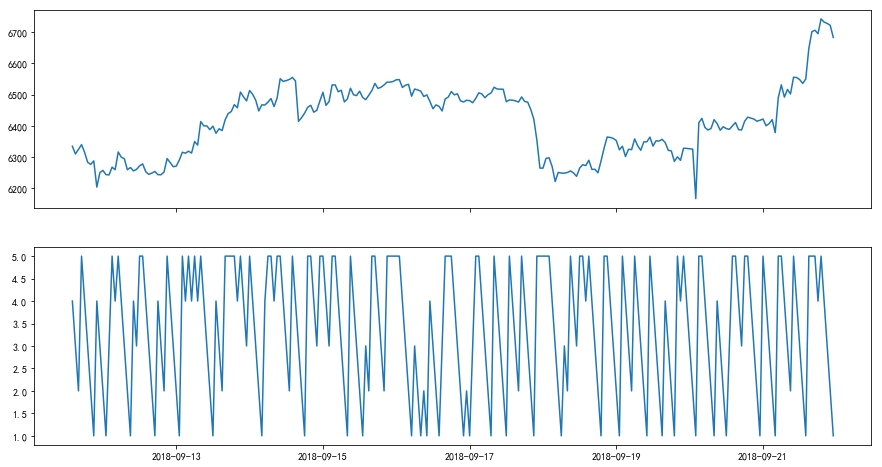

In [8]:
plot_chart(close, alpha1_plot)

画了alpha101因子中的alpha001因子

该因子描述了5日前，5日内上涨的最高收盘价或5日都下跌时的最大波动的日期坐标。根据因子算法可知，这个因子刻画了收盘价的走势，因子的转折与收盘价的转折正相关（收盘价与因子转折方向相同），且与转折的幅度无关，而在上图也得到了验证。

4.2

In [9]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

path = r'D:\BaiduNetdiskDownload\信号试题\min_data\VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180601000000,'end_date':20181001000000}

Time_dict2 = ds.bar_reader(path,props)

In [10]:
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv2 = HFDataView()
dv2.create_init_dv(Time_dict2.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [11]:
data1H = Time_dict2.set_index('datetime')

In [12]:
import matplotlib.pyplot as plt
import mpl_finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.1, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data1H.index, data1H.volume,width=0.1)
    plt.show()

In [13]:
Morning_star = dv2.add_formula('Morning_star',"If(Ta('CDLMORNINGSTAR',0,open,high,low,close,volume)==100,100,0)",add_data=True)

In [14]:
from matplotlib.pylab import date2num

data1H['candleTime'] = list(map(date2num, data1H.index))
candle = data1H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

In [15]:
MSVolume = dv2.get_ts('Morning_star', date_type='datetime')

In [16]:
MSVolumeX = MSVolume[MSVolume['BTCUSDT:binance']==100].index
MSVolumeY = data1H.loc[MSVolumeX].low-100

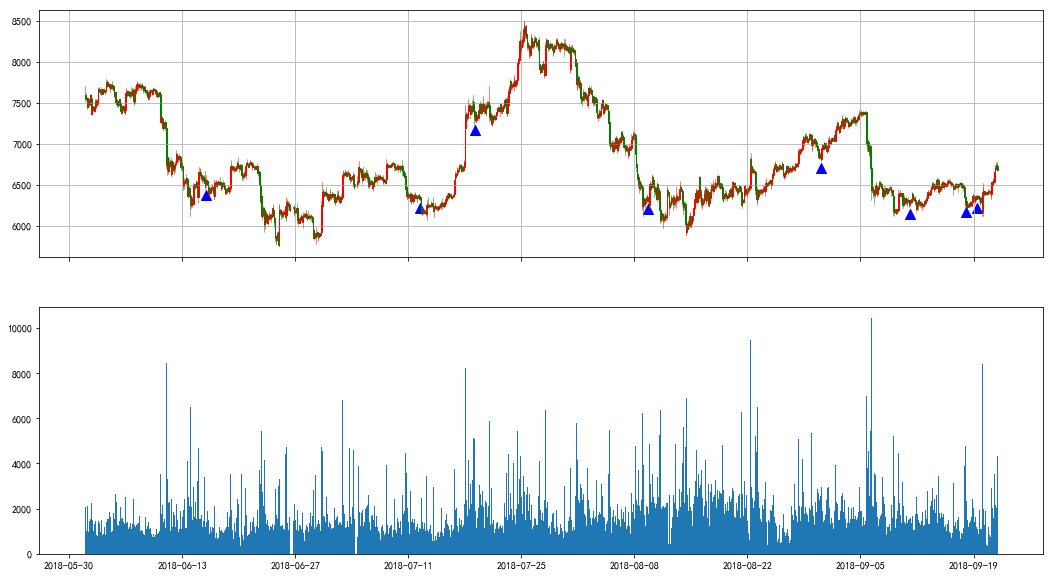

In [17]:
draw_candle(candle,MSVolumeX,MSVolumeY)

画了Morning Star因子

该因子是一个反转信号因子，由跌转升的信号。如上图，观察到该因子出现后，后续行情中会有终止下跌，并且小段上升的现象。

# 5

5.1 alpha001因子

与价格联系：因子的转折与收盘价的转折正相关（收盘价与因子转折方向相同）

信号：因子的转折（由1变5、由5变4）

信号进出场假设：因子由1变5为买入信号，因子由5变4为卖出信号

5.2 Morning Star因子

与成交量联系：该因子出现后，会出现平均成交量上涨

信号：出现因子、成交量的MACD

信号进出场假设：出现因子为买入信号，成交量的MACD<0为卖出信号